<a href="https://colab.research.google.com/github/randallscott25/Curriculum-Vitae/blob/master/Week3Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Randall Scott Taylor 

### Week 3 Labs 

This is a quick overview of major models for consumer choice and product promotion. 

This is something that's a little new for us. We've got this user-defined module, import evaluate classifier as eval. And if we go into our directory, we can see that that script or that module-- that script, that module is sitting right here. We're going to call that and we're going to use that to determine how we did, as far as classifying this consumer as one who would switch or one who wouldn't switch

In [2]:
#Based on Miller (2015)
#Data based on cell phone switching between plans

#You will need to call the evaluate_classifier.py alogorithm module, 
#ensure that it is in the same colab / jupyter directory 

#The purpose of this is to endeavor to idenify targets (Python)

%matplotlib inline

#import packages for TEXT PROCESSING and MACHINE LEARNING 
import pandas as pd # DataFrame structure and operations
import numpy as np #arrays and numerical processing 
import matplotlib.pyplot as plt #this is for 2D
import statsmodels.api as sm # logistic regression 
import statsmodels.formula.api as smf # R-like model specification 
import patsy # translate model specificatgion into design matrices 

import seaborn as sns # Provides Trellis and small muliple plotting 

#IMPORT The User Define Algorythm 
import evaluate_classifier as eval 



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# DATA SECTION 

# Read in comm-delimited text-file and create DF

# there are blank character fields for missing data 

# read them as character fields intially 



In [3]:
cell = pd.read_csv('CellSwitching.csv', sep = ',', header =0)
print(cell.head())

   age          job  marital  education  ... months  devices poutcome bresponse
0   30   unemployed  married    primary  ...     79        1  unknown         0
1   33     services  married  secondary  ...    220        5  failure         0
2   35   management   single   tertiary  ...    185        2  failure         0
3   30   management  married   tertiary  ...    199        1  unknown         0
4   59  blue-collar  married  secondary  ...    226        1  unknown         0

[5 rows x 14 columns]


# Observations of the Data: 

Job Types: merge together 
Change Marital Status. 
Eliminate the Unknowns 
Add Missing Values

# Directive 

create a dataframe named cell_work
y = promotion package 

In [4]:
cell = pd.read_csv('CellSwitching.csv', sep = ',', header =0)
print(cell.head())

   age          job  marital  education  ... months  devices poutcome bresponse
0   30   unemployed  married    primary  ...     79        1  unknown         0
1   33     services  married  secondary  ...    220        5  failure         0
2   35   management   single   tertiary  ...    185        2  failure         0
3   30   management  married   tertiary  ...    199        1  unknown         0
4   59  blue-collar  married  secondary  ...    226        1  unknown         0

[5 rows x 14 columns]


# OSEMN
 Above we have obtained the information needed from the dataset into a python dataframe. 

 At this point we will need to scrub the data in order to be able to EXPLORE, MODEL, and iNtepret the data. 

In [5]:
  #define jobtype variable 
  job_to_jobtype = {'admin' :'White Collar',\
                    'entrepreneur' :'White Collar',\
                    'management' :'White Collar',\
                    'self-employed' :'White Collar',\
                    'blue-collar' :'Blue Collar',\
                    'services' :'Blue Collar',\
                    'technician' :'Blue Collar'}
cell['jobtype'] = cell['job'].map(job_to_jobtype)
cell['jobtype'] = cell['jobtype'].fillna('Other/Unknown')
print(cell.head())


   age          job  marital  ... poutcome bresponse        jobtype
0   30   unemployed  married  ...  unknown         0  Other/Unknown
1   33     services  married  ...  failure         0    Blue Collar
2   35   management   single  ...  failure         0   White Collar
3   30   management  married  ...  unknown         0   White Collar
4   59  blue-collar  married  ...  unknown         0    Blue Collar

[5 rows x 15 columns]


In [7]:
#set martial variable 
marital_to_label = {'divored' :'Divorced',\
                    'married' :'Married',\
                    'single' :'Single' }
cell['marital'] = cell['marital'].map(marital_to_label)
cell['marital'] = cell['marital'].fillna('Unknown')
#Set Education variable 
education_to_label = {'primary' :'Primary',\
                      'secondary' :'Secondary',\
                      'tertiary' :'Teriary'}
cell['education'] = cell['education'].map(education_to_label)
cell['education'] = cell['education'].fillna('Unknown')

#set no/yes variable labels
noyes_to_label = {'no' :'No', 'yes' :'Yes'}
cell['default'] =  cell['default'].map(noyes_to_label)
cell['default'] = cell['default'].fillna('No')

# code response as binary variable 
noyes_to_binary = {'No' :'0', 'Yes':'1'}
cell['repairplan'] = cell['repairplan'].map(noyes_to_binary)
cell['repairplan'] = cell['repairplan'].fillna('No')

#work only with cell cleints who are being apprached for the fist time 
filter = cell['poutcome'].map(lambda d: d == 'unknown')

# apply the filter and select columns needed for targeting model 

cellwork = pd.DataFrame(cell[filter], columns = ['bresponse','age','jobtype',\
                                                'education', 'marital', 'default', 'balance', 'rentown', 'repairplan', 'months', 'devices' ])
print(cellwork.head())
print(cellwork.shape)

   bresponse  age        jobtype education  ... rentown repairplan  months devices
0          0   30  Other/Unknown   Unknown  ...    rent          0      79       1
3          0   30   White Collar   Unknown  ...     own          0     199       1
4          0   59    Blue Collar   Unknown  ...     own          0     226       1
7          0   39    Blue Collar   Unknown  ...     own          0     151       1
8          0   41   White Collar   Unknown  ...     own          0      57       1

[5 rows x 11 columns]
(3705, 11)


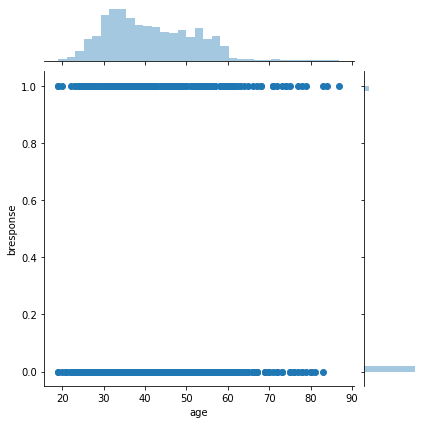

In [8]:
sns.jointplot(x="age", y='bresponse', data=cellwork)

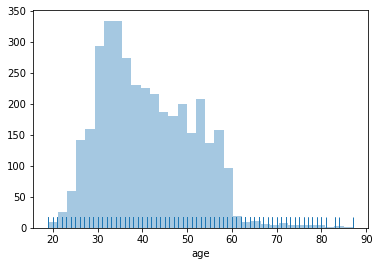

In [9]:
sns.distplot(cellwork['age'], kde=False, rug=True)

#Notice that the primary target is late 20 early 40 but look at the age groups in the tail 

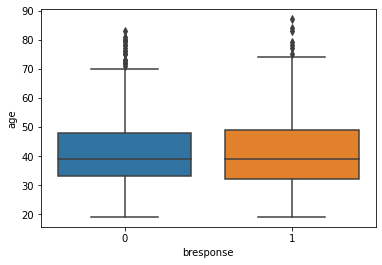

In [10]:
sns.boxplot(x='bresponse', y='age', data=cellwork)

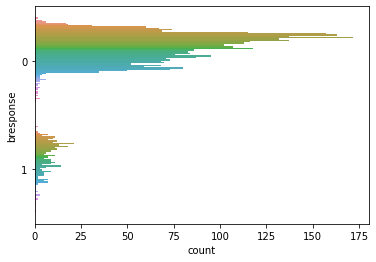

In [11]:
ax = sns.countplot(y='bresponse', data=cellwork, hue ='age')
ax.legend_.remove()

# INTENSIVE PLOTS 

sns.swormplot and 
sns.violineplot 
advance plotting of the data  

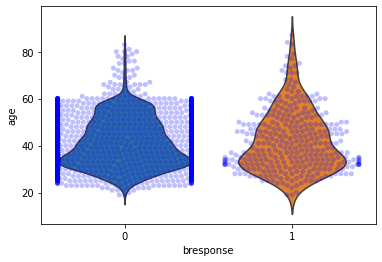

In [12]:
sns.violinplot(x='bresponse', y='age', data=cellwork, inner=None)
sns.swarmplot(x='bresponse', y='age', data=cellwork, color='b', alpha = 0.25)

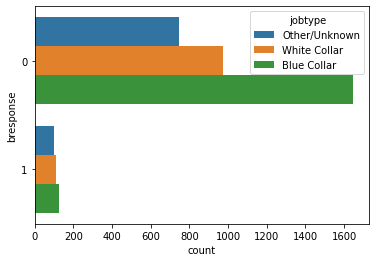

In [13]:
sns.countplot(y='bresponse', data=cellwork,
              hue='jobtype')
sns.xlabel=('Customer Count')
sns.ylabel=('Customers who have switched')


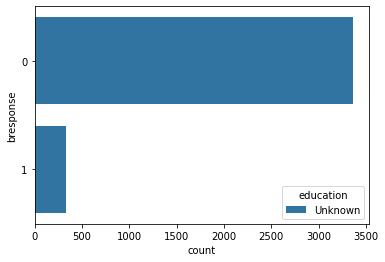

In [32]:
sns.countplot(y="bresponse", data=cellwork,
             hue="education")
sns.xlabel=("Customer Count")
sns.ylabel=("Customers who switch")

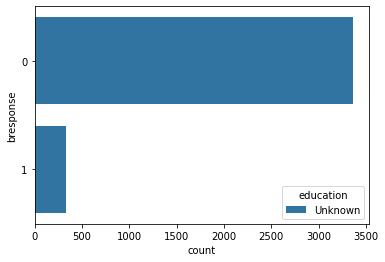

In [14]:
sns.countplot(y='bresponse', data=cellwork,
              hue='education')
sns.xlabel=('Customer Count')
sns.ylabel=('Customers who switch')

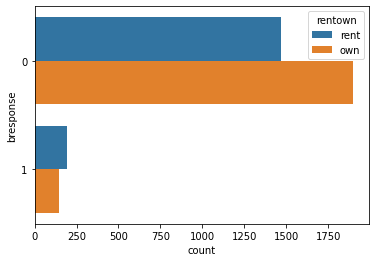

In [15]:
sns.countplot(y='bresponse', data=cellwork,
              hue='rentown')

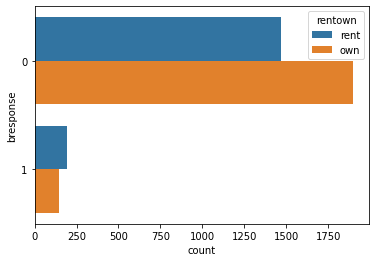

In [16]:
#Another deviation between reponse ratios
sns.countplot(y='bresponse', data=cellwork, 
              hue='rentown')
sns.xlabel=('Customer Count')
sns.ylabel=('Customers who switch')

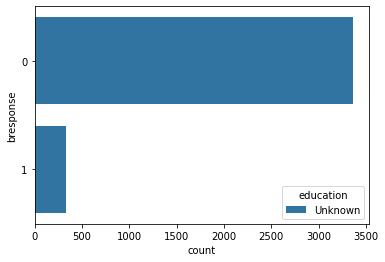

In [31]:
sns.countplot (y='bresponse', data=cellwork,
               hue='education')
sns.xlabel=('Customer Count')
sns.label=('Customers who switch')

#END MODEL REVIEW 

# BEGINNING OF CODE REVIEW 



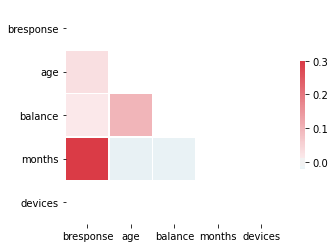

In [35]:
corr = cellwork.corr()

#generate a mask for the upper triangle 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#generate a custom diverging colormap 

cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ration 
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, 
            square=True, linewidths=.5, cbar_kws={'shrink': .5}
            )

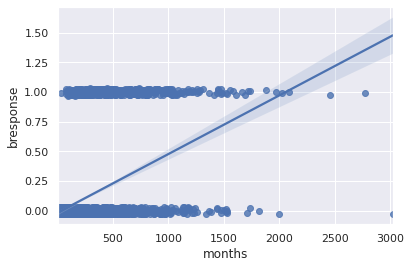

In [38]:
# Quick Scatter Plot to Look at the Relationship between variables

sns.set(color_codes=True)
sns.regplot(x='months', y='bresponse', data=cell, y_jitter=0.03)



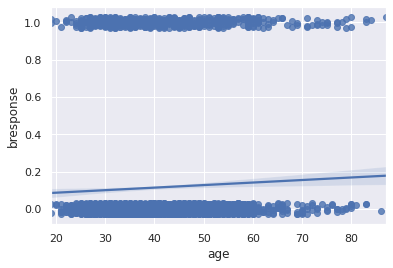

In [39]:
sns.regplot(x='age', y='bresponse', data=cell, y_jitter=0.03)


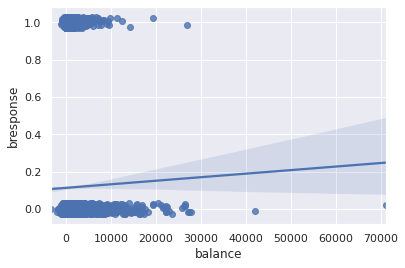

In [40]:
# How might we look at account balance and response 
sns.regplot(x='balance', y='bresponse', data=cell, y_jitter=0.03)



In [43]:
#How might we look at rent to own verus response 
#sns.regplot(x='rentown', y='bresponse', data=cell, y_jitter=0.03)

In [45]:
print(cellwork.describe())

print(cell.pivot_table(['age'], index = ['bresponse']))
print(cell.pivot_table(['devices'], index = ['bresponse']))
print(cell.pivot_table(['months'], index = ['bresponse']))


         bresponse          age       balance       months  devices
count  3705.000000  3705.000000   3705.000000  3705.000000   3705.0
mean      0.090958    41.083671   1374.862078   262.103104      1.0
std       0.287588    10.373818   3008.524207   262.937329      0.0
min       0.000000    19.000000  -3313.000000     4.000000      1.0
25%       0.000000    33.000000     60.000000   102.000000      1.0
50%       0.000000    39.000000    415.000000   180.000000      1.0
75%       0.000000    49.000000   1412.000000   327.000000      1.0
max       1.000000    87.000000  71188.000000  3025.000000      1.0
                 age
bresponse           
0          40.998000
1          42.491363
            devices
bresponse          
0          1.471250
1          2.090211
               months
bresponse            
0          226.347500
1          552.742802


In [46]:
# examine descriptive statistics and frequency tables for variables in model 
print(cellwork.describe())
print('\njobtype:\n', cellwork['jobtype'].value_counts())
print('\nmaritial: \n', cellwork['marital'].value_counts())
print('\neducation: \n', cellwork['education'].value_counts())
print('\ndefault: \n', cellwork['default'].value_counts())
print('\nhousing: \n', cellwork['rentown'].value_counts())

         bresponse          age       balance       months  devices
count  3705.000000  3705.000000   3705.000000  3705.000000   3705.0
mean      0.090958    41.083671   1374.862078   262.103104      1.0
std       0.287588    10.373818   3008.524207   262.937329      0.0
min       0.000000    19.000000  -3313.000000     4.000000      1.0
25%       0.000000    33.000000     60.000000   102.000000      1.0
50%       0.000000    39.000000    415.000000   180.000000      1.0
75%       0.000000    49.000000   1412.000000   327.000000      1.0
max       1.000000    87.000000  71188.000000  3025.000000      1.0

jobtype:
 Blue Collar      1776
White Collar     1083
Other/Unknown     846
Name: jobtype, dtype: int64

maritial: 
 Unknown    3705
Name: marital, dtype: int64

education: 
 Unknown    3705
Name: education, dtype: int64

default: 
 No    3705
Name: default, dtype: int64

housing: 
 own     2043
rent    1662
Name: rentown, dtype: int64


In [49]:
#examine means of continuous explanatory variables by response
print(cellwork.pivot_table(['age'], index = ['bresponse']))
print(cellwork.pivot_table(['balance'], index = ['bresponse']))

                 age
bresponse           
0          40.983076
1          42.089021
               balance
bresponse             
0          1359.654097
1          1526.851632


In [51]:
#baseline response rate computed (this will be utilized later)
filter_took_offer = cellwork['bresponse'].map(lambda d: d == 1)
baseline_response_rate = len(cellwork[filter_took_offer]) / len(cellwork)
print('\nBaseline proportion of clients responding to offer: ',\
      round(baseline_response_rate, 5), '\n')


Baseline proportion of clients responding to offer:  0.09096 



In [52]:
#examine proportion responding across levels of categorical variables 
print(cellwork.pivot_table(['bresponse'], index = ['jobtype']))
print(cellwork.pivot_table(['bresponse'], index = ['education']))
print(cellwork.pivot_table(['bresponse'], index = ['marital']))
print(cellwork.pivot_table(['bresponse'], index = ['default']))
print(cellwork.pivot_table(['bresponse'], index = ['rentown']))

               bresponse
jobtype                 
Blue Collar     0.072072
Other/Unknown   0.118203
White Collar    0.100646
           bresponse
education           
Unknown     0.090958
         bresponse
marital           
Unknown   0.090958
         bresponse
default           
No        0.090958
         bresponse
rentown           
own       0.069995
rent      0.116727


# LOGIT MODEL FOR SWITCH



In [54]:
# specitfy model for logistic regression 
cell = 'bresponse ~ age + jobtype + education + marital +\
     default + balance + rentown'

#step 2
#----------------------------------------------------
# fit logistic regression model 
#----------------------------------------------------
#convert R-like formula into design matrix neded for statsmodels
y,x = patsy.dmatrices(cell, cellwork, return_type = 'dataframe')

my_logit_model = sm.Logit(y,x)
#Now, fit the model to the full data set 
my_logit_model_fit = my_logit_model.fit()
print(my_logit_model_fit.summary())

#Last Now predict the probability of responding to the offer 
cellwork['pred_logit_prob'] = my_logit_model_fit.predict(linear = False) 

Optimization terminated successfully.
         Current function value: 0.300029
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              bresponse   No. Observations:                 3705
Model:                          Logit   Df Residuals:                     3699
Method:                           MLE   Df Model:                            5
Date:                Thu, 16 Jul 2020   Pseudo R-squ.:                 0.01549
Time:                        18:48:26   Log-Likelihood:                -1111.6
converged:                       True   LL-Null:                       -1129.1
Covariance Type:            nonrobust   LLR p-value:                 1.521e-06
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -2.8489      0.234    -12.168      0.000      -3.308

# End Code Review 


In [58]:
# map target from probabilty cuttoff specified
def prob_to_pred(x, cutoff):
  if(x > cutoff):
    return(1)
  else:
    return(0)


In [62]:
# try cutoff set at 0.10
cellwork['pred_logit_10'] =\
    cellwork['pred_logit_prob'].\
    apply(lambda d: prob_to_pred(d, cutoff = 0.10))    
print('\nConfusion matrix for 0.10 cutoff\n',\
    pd.crosstab(cellwork.pred_logit_10, cellwork.bresponse, margins = True)) 

print('\n Logistic Regression Performance (0.10 cutoff)\n',\
    'Percentage of Targets Correctly Classified:',\
    100 * round(eval.evaluate_classifier(cellwork['pred_logit_10'],\
    cellwork['bresponse'])[4], 3),'\n')


Confusion matrix for 0.10 cutoff
 bresponse         0    1   All
pred_logit_10                 
0              2465  200  2665
1               903  137  1040
All            3368  337  3705


AttributeError: ignored

In [63]:
decile_label = []
for i in range(10):
  decile_label.append('Decile_' +str(10 - i))
  #draws on baseline response rate computed earlier 
  def lift(x):
    return(x / baseline_response_rate)

In [65]:
prediction_deciles = pd.qcut(cellwork.pred_logit_prob, 10, labels = decile_label)
decile_groups = cellwork.bresponse.groupby(prediction_deciles)
print(decile_groups.mean())
lift_values = decile_groups.mean() /baseline_response_rate
print('\nLift Chart Values by Decile: \n', lift_values, '\n')


pred_logit_prob
Decile_10    0.070081
Decile_9     0.059459
Decile_8     0.051213
Decile_7     0.089189
Decile_6     0.072776
Decile_5     0.100000
Decile_4     0.083784
Decile_3     0.099730
Decile_2     0.129730
Decile_1     0.153639
Name: bresponse, dtype: float64

Lift Chart Values by Decile: 
 pred_logit_prob
Decile_10    0.770474
Decile_9     0.653701
Decile_8     0.563038
Decile_7     0.980552
Decile_6     0.800107
Decile_5     1.099407
Decile_4     0.921124
Decile_3     1.096443
Decile_2     1.426257
Decile_1     1.689115
Name: bresponse, dtype: float64 



In [66]:
#apply filter and select columns needed for targeting model 
switchcell = pd.DataFrame(cell)


ValueError: ignored

# Model Market Basket Analysis - Association rules in python 

import pandas as pd
#following package best imported and installed via conda prompt 
#conda install -c cond-forge mixtend

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [68]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import seaborn as sns 
import matplotlib.pyplot as plt


# Obtain data from UCI machaine learning archive 


In [69]:
df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [70]:
# Scrub the data with some minor transformations 

df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]


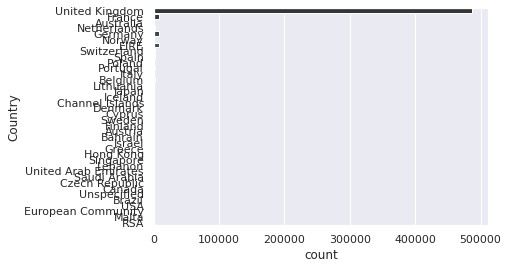

In [71]:
#EXPLORE data with some visuals

#BARPLOT SHOWING NUMBER ORDERS PER COUNTRY 
sns.countplot( y='Country', data=df, palette='Blues_d')


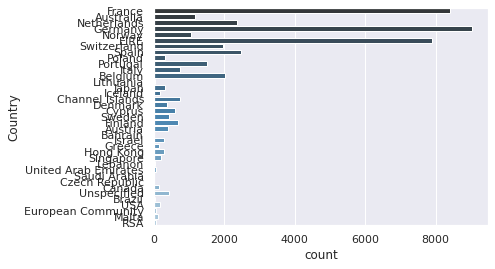

In [72]:
#united kingdom has way to much influence 
#barplot minus the united kingdom 
dfukless = df[df.Country != 'United Kingdom']
sns.countplot(y='Country', data=dfukless, palette='Blues_d')

In [73]:
# Just France 
basket = (df[df['Country'] =='France']
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [74]:
def encode_units(x):
  if x <= 0:
    return 0
  if x >= 1:
    return 1
basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)


In [75]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

In [76]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold= 1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061


In [78]:
rules[ (rules['lift'] >=6 ) &
       (rules['confidence'] >= 0.8)
      
]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
16,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735
18,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041
19,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122
20,"(SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.122449,0.132653,0.099490,0.812500,6.125000,0.083247,4.625850
21,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,0.086474,34.897959
22,"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975000,7.077778,0.085433,34.489796


In [77]:
## Germany 

basket2 = (df[df['Country'] == 'Germany']
           .groupby(['InvoiceNo','Description'])['Quantity']
           .sum().unstack().reset_index().fillna(0)
           .set_index('InvoiceNo'))
basket_set2 = basket2.applymap(encode_units)
basket_set2.drop('POSTAGE', inplace=True, axis = 1)
frequent_itemsets2 = apriori(basket_set2, min_support=0.05, use_colnames=True)
rules4 = association_rules(frequent_itemsets2, metric='lift', min_threshold=1)

rules4[  (rules4['lift'] >= 4) &
         (rules4['confidence'] >=0.5 )]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.115974,0.137856,0.067834,0.584906,4.242887,0.051846,2.076984
6,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.107221,0.137856,0.061269,0.571429,4.145125,0.046488,2.011670
10,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.070022,0.126915,0.059081,0.843750,6.648168,0.050194,5.587746


In [79]:
## NOW LOOK AT Portugal

basket2 = (df[df['Country'] =="Portugal"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

basket_sets2 = basket2.applymap(encode_units)
basket_sets2.drop('POSTAGE', inplace=True, axis=1)
frequent_itemsets2 = apriori(basket_sets2, min_support=0.05, use_colnames=True)
rules3 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)

rules3[ (rules3['lift'] >= 8) &
        (rules3['confidence'] >= 0.8)]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,(50'S CHRISTMAS GIFT BAG LARGE),(WOODEN TREE CHRISTMAS SCANDINAVIAN),0.051724,0.068966,0.051724,1.0,14.500000,0.048157,inf
120,(STRAWBERRY FAIRY CAKE TEAPOT),(CERAMIC STRAWBERRY CAKE MONEY BANK),0.068966,0.086207,0.068966,1.0,11.600000,0.063020,inf
199,(JUMBO BAG ALPHABET),(CHARLOTTE BAG VINTAGE ALPHABET),0.051724,0.068966,0.051724,1.0,14.500000,0.048157,inf
200,(CHARLOTTE BAG VINTAGE ALPHABET),(LUNCH BAG ALPHABET DESIGN),0.068966,0.068966,0.068966,1.0,14.500000,0.064209,inf
201,(LUNCH BAG ALPHABET DESIGN),(CHARLOTTE BAG VINTAGE ALPHABET),0.068966,0.068966,0.068966,1.0,14.500000,0.064209,inf
...,...,...,...,...,...,...,...,...,...
334914,"(RED RETROSPOT CHARLOTTE BAG, LUNCH BAG VINTAG...","(LUNCH BAG CARS BLUE, LUNCH BAG SPACEBOY DESIG...",0.051724,0.051724,0.051724,1.0,19.333333,0.049049,inf
334916,"(RED RETROSPOT CHARLOTTE BAG, JUMBO BAG VINTAG...","(LUNCH BAG CARS BLUE, LUNCH BAG SPACEBOY DESIG...",0.051724,0.051724,0.051724,1.0,19.333333,0.049049,inf
334926,"(LUNCH BAG SPACEBOY DESIGN, JUMBO BAG RED RETR...","(LUNCH BAG CARS BLUE, RED RETROSPOT CHARLOTTE ...",0.051724,0.051724,0.051724,1.0,19.333333,0.049049,inf
334927,"(LUNCH BAG SPACEBOY DESIGN, LUNCH BAG VINTAGE ...","(LUNCH BAG CARS BLUE, RED RETROSPOT CHARLOTTE ...",0.051724,0.051724,0.051724,1.0,19.333333,0.049049,inf
